In [1]:
import sys
import os


sys.path.append(os.path.abspath(".."))  



import matplotlib.pyplot as plt
import pandas as pd 
from utils.paths import DATA_SALES_EVALUATION, DATA_SALES_VALIDATION, DATA_TRAIN_SET, DATA_TEST_SET
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from fastparquet import *
import lightgbm as lgb


In [2]:
X_train = pd.read_parquet(DATA_TRAIN_SET)
y_train = X_train['sales']
X_train.drop(y_train)
X_train.drop('date', axis=1, inplace=True)

X_test = pd.read_parquet(DATA_TEST_SET)
X_test.drop('date', axis=1, inplace=True)



In [3]:
lgb_model = lgb.LGBMRegressor(verbose = -1)
lgb_model.fit(X_train, y_train)

LGBMRegressor(verbose=-1)

In [4]:
y_pred_lgb = lgb_model.predict(X_test)
print(X_test)
y_pred_lgb = y_pred_lgb.round()
print(y_pred_lgb)


    id  item_id  dept_id  cat_id  store_id  state_id   d  sales  wm_yr_wk  \
0    0        0        0       0         0         0   0      0     11609   
1    0        0        0       0         0         0   1      1     11609   
2    0        0        0       0         0         0   2      0     11609   
3    0        0        0       0         0         0   3      0     11609   
4    0        0        0       0         0         0   4      0     11609   
5    0        0        0       0         0         0   5      0     11610   
6    0        0        0       0         0         0   6      0     11610   
7    0        0        0       0         0         0   7      0     11610   
8    0        0        0       0         0         0   8      0     11610   
9    0        0        0       0         0         0   9      1     11610   
10   0        0        0       0         0         0  10      0     11610   
11   0        0        0       0         0         0  11      0     11610   

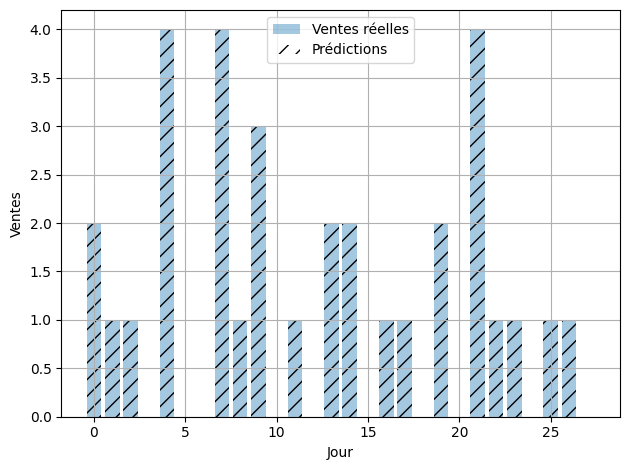

In [18]:
plt.bar(X_test['d'], X_test['sales'], alpha = 0.4, label = "Ventes réelles")
plt.bar(X_test['d'], y_pred_lgb, alpha = 0.0001, hatch = '//', label = "Prédictions")
plt.xlabel("Jour")
plt.ylabel("Ventes")
plt.legend()
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

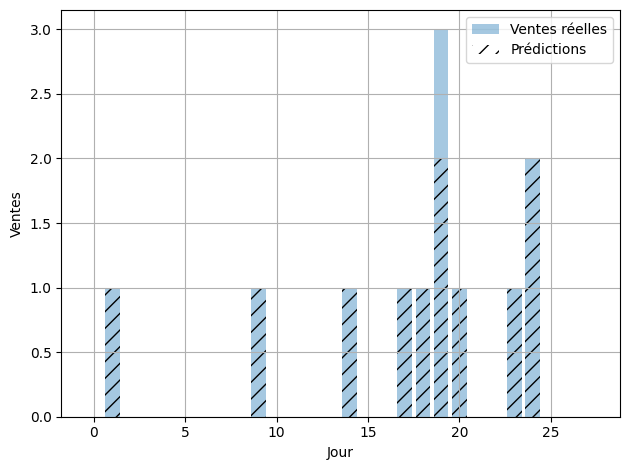

In [5]:
plt.bar(X_test['d'], X_test['sales'], alpha = 0.4, label = "Ventes réelles")
plt.bar(X_test['d'], y_pred_lgb, alpha = 0.0001, hatch = '//', label = "Prédictions")
plt.xlabel("Jour")
plt.ylabel("Ventes")
plt.legend()
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()